In [1]:
!git clone https://github.com/ycformal/visprog
!cd visprog
%cd visprog
!pip install openai==0.28
!pip install face_detection
!pip install augly
!pip install ipdb
!pip install diffusers
!pip install accelerate
!pip install timm
!pip install flash_attn
!pip install Pillow==9.5.0

fatal: destination path 'visprog' already exists and is not an empty directory.
/content/visprog


In [3]:
!curl -L -o WIDERFace_DSFD_RES152.pth "https://www.dropbox.com/scl/fi/uoamw259cumgaj145uzgf/WIDERFace_DSFD_RES152.pth?rlkey=wtt7w281i31ej3kyuqeg32udd&st=1hawkpx3&dl=0"
!mkdir /root/.cache/torch
!mkdir /root/.cache/torch/hub
!mkdir /root/.cache/torch/hub/checkpoints
!mv WIDERFace_DSFD_RES152.pth /root/.cache/torch/hub/checkpoints/WIDERFace_DSFD_RES152.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     14      0  0:00:01  0:00:01 --:--:--    14
100   491    0   491    0     0    219      0 --:--:--  0:00:02 --:--:--   595
100  458M  100  458M    0     0  9419k      0  0:00:49  0:00:49 --:--:-- 10.1M
mkdir: cannot create directory ‘/root/.cache/torch’: File exists
mkdir: cannot create directory ‘/root/.cache/torch/hub’: File exists
mkdir: cannot create directory ‘/root/.cache/torch/hub/checkpoints’: File exists


In [4]:
from PIL import Image
from IPython.core.display import HTML, display

from engine.utils import ProgramInterpreter
from prompts.gqa import create_prompt
interpreter = ProgramInterpreter(dataset='okDet')
import openai
openai.api_key="*"

def execute(image, prompt):
    image.thumbnail((640,640),Image.Resampling.LANCZOS)
    init_state = dict(
        IMAGE=image.convert('RGB')
    )
    display(image)
    result, prog_state, html_str = interpreter.execute(prompt,init_state,inspect=True)
    display(HTML(html_str))

Registering FACEDET step


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering LIST step
Registering CLASSIFY step


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Registering RESULT step
Registering TAG step
Registering LOC step


preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

In [5]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [10]:
!curl -L -o DejaVuSansMono-Bold.ttf "https://www.dropbox.com/scl/fi/6peglfd80ukkrji1cmh83/DejaVuSansMono-Bold.ttf?rlkey=93bop91sicpj0dcq55eg78uql&st=odkusvqm&dl=0"
!mkdir /usr/share/fonts/truetype/dejavu/
!mkdir /usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
!mv DejaVuSansMono-Bold.ttf /usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     15      0  0:00:01  0:00:01 --:--:--    15
100   491    0   491    0     0    293      0 --:--:--  0:00:01 --:--:--   293
100  323k  100  323k    0     0  90857      0  0:00:03  0:00:03 --:--:--  331k
mkdir: cannot create directory ‘/usr/share/fonts/truetype/dejavu/’: File exists
mkdir: cannot create directory ‘/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf’: File exists


Registering EVAL step


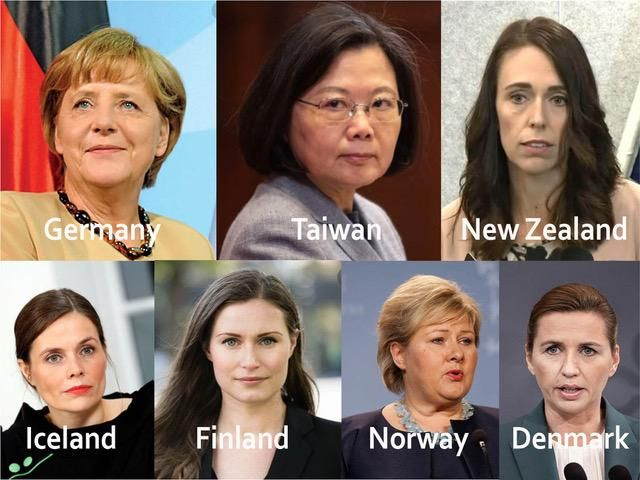

FACEDET
LIST
LIST
LIST
EVAL
CLASSIFY
TAG
RESULT



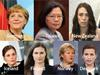
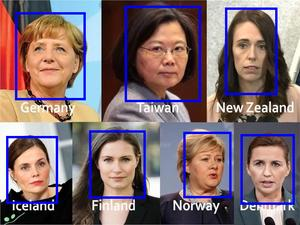
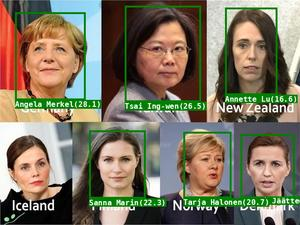
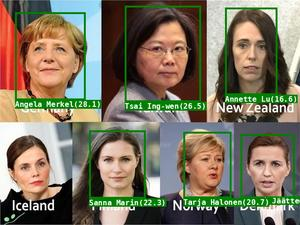

In [18]:
from engine import step_interpreters
interpreter.step_interpreters['EVAL']=step_interpreters.EvalInterpreter()
image = Image.open('./assets/women_leaders.png')
execute(image, "OBJ0=FACEDET(image=IMAGE)\nLIST0=LIST(query='women leaders of Germany',max=3)\nLIST1=LIST(query='women leaders of Taiwan',max=3)\nLIST2=LIST(query='women leaders of Finland',max=3)\nLIST3=EVAL(expr='{LIST0}+{LIST1}+{LIST2}')\nOBJ1=CLASSIFY(image=IMAGE,object=OBJ0,categories=LIST3)\nIMAGE0=TAG(image=IMAGE,object=OBJ1)\nFINAL_RESULT=RESULT(var=IMAGE0)")

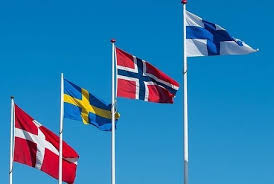

LOC



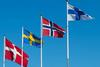
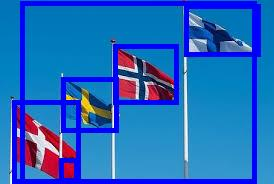

In [21]:
image = Image.open('./assets/flags.png')
execute(image, "OBJ0=LOC(image=IMAGE,object='flag')")

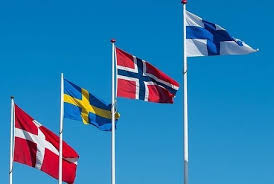

{'<MORE_DETAILED_CAPTION>': 'The image shows four flags of different countries flying in the sky. The flags are arranged in a row, with the first flag on the left, the second flag in the middle, the third flag on top, and the fourth flag at the bottom. All four flags are attached to white poles and are flying at a slight angle. The background is a clear blue sky.'}


In [22]:
prompt = "<MORE_DETAILED_CAPTION>"

image = Image.open('./assets/flags.png').convert('RGB')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
# crop to be half width
# image = image.crop((0, 0, image.width/4, image.height))
display(image)

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<MORE_DETAILED_CAPTION>", image_size=(image.width, image.height))

print(parsed_answer)